In [ ]:
import os
import warnings

from keras import models
from keras import layers
from keras.regularizers import l2

def cnn_padrao(img_input, name_base, kernel_size):

    global backend, layers, models, keras_utils   

    bn_axis = 3
    x = layers.Conv2D(128, kernel_size,
                      strides=(1, 1),
                      padding='same',
                      activation='relu',
                      kernel_regularizer=l2(1e-5),
                      kernel_initializer='he_normal',
                      name=name_base)(img_input)    
    return x    


def inceptionAdaptada(include_top=True,
             input_tensor=None,
             input_shape=(100,100,1),
             pooling=None,
             classes=2,
             **kwargs):
    
    global backend, layers, models, keras_utils

    inp = layers.Input(shape=input_shape, name='Entrada')    

    xConv3 = cnn_padrao(inp,'Kernel_3x3', 3)
    xConv5 = cnn_padrao(inp,'Kernel_5x5', 5)  
    xConv7 = cnn_padrao(inp,'Kernel_7x7', 7)  
    x = layers.concatenate([xConv3, xConv5, xConv7],name='Concatena')

    x = layers.Conv2D(64, (3, 3),
                      strides=(1, 1),
                      activation='relu',
                      kernel_regularizer=l2(1e-5),
                      kernel_initializer='he_normal',
                      name='Camada2')(x)
    x = MaxPooling2D(pool_size=(2,2), name='MaxPol2')(x)

    x = layers.Conv2D(32, (3, 3),
                      strides=(1, 1),                      
                      activation='relu',
                      kernel_regularizer=l2(1e-5),
                      kernel_initializer='he_normal',
                      name='Camada3')(x)
    x = MaxPooling2D(pool_size=(2,2), name='MaxPol3')(x)

    x = layers.Flatten()(x)
    x = layers.Dropout(0.5, name='Dropout1')(x)
    x = layers.Dense(128, activation='relu', name='camda4')(x)
    x = layers.Dropout(0.5, name='Dropout2')(x)
    x = layers.Dense(64, activation='relu', name='camda5')(x)

    if include_top:
        x = layers.Dense(classes, activation='softmax', name='Saida')(x)

    inputs = inp
    model = models.Model(inputs, x, name='inception_modificada')

    return model

In [ ]:
model = inceptionAdaptada()

In [ ]:
model.summary()

Model: "inception_modificada"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Entrada (InputLayer)           [(None, 100, 100, 1  0           []                               
                                )]                                                                
                                                                                                  
 Kernel_3x3 (Conv2D)            (None, 100, 100, 12  1280        ['Entrada[0][0]']                
                                8)                                                                
                                                                                                  
 Kernel_5x5 (Conv2D)            (None, 100, 100, 12  3328        ['Entrada[0][0]']                
                                8)                                             

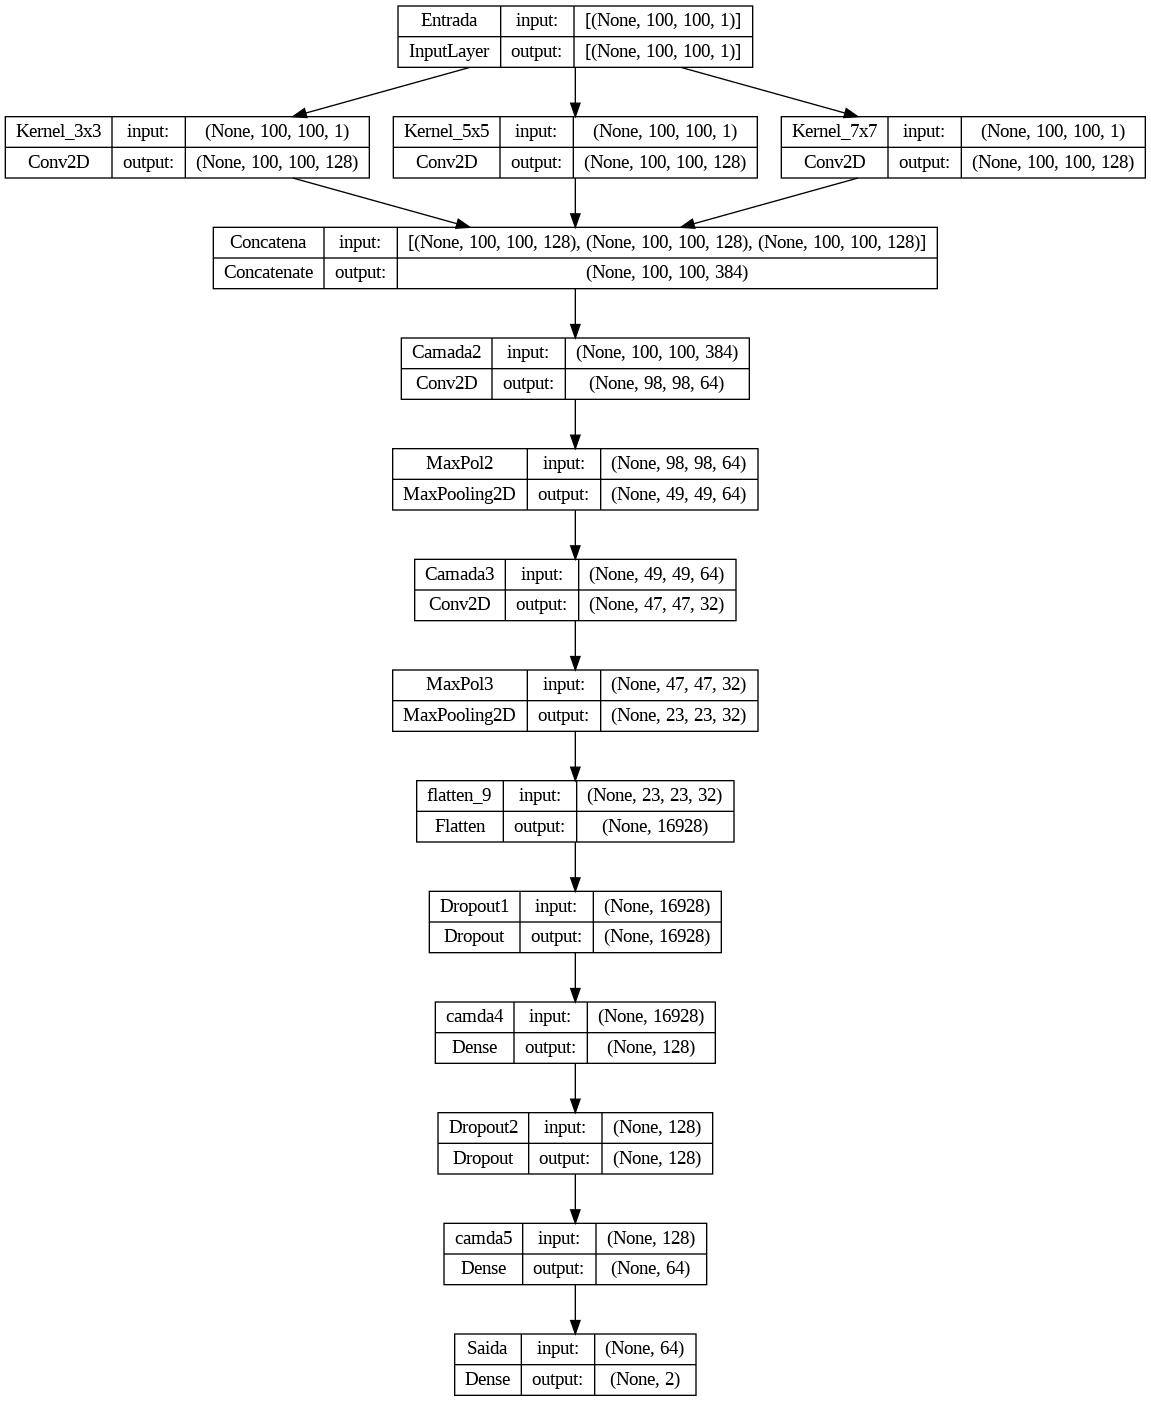

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)